In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\data\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1886,2020-10-07,United Kingdom,535248.0,530113.0,42425.0,42445.0,5135.0,-20.0
1887,2020-10-07,Germany,304495.0,306086.0,9555.0,9562.0,-1591.0,-7.0
1888,2020-10-07,Iran,478711.0,479825.0,27385.0,27419.0,-1114.0,-34.0
1889,2020-10-07,Turkey,327166.0,327557.0,8546.0,8553.0,-391.0,-7.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  12203.95399259651
RMSE =  43292.496478678906


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  325.85034373347435
RMSE =  828.0118642124479


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  90808.04494382022
RMSE =  137300.16462620147
-- World performances for deaths --
MAE =  1988.426966292135
RMSE =  2424.9247341499354


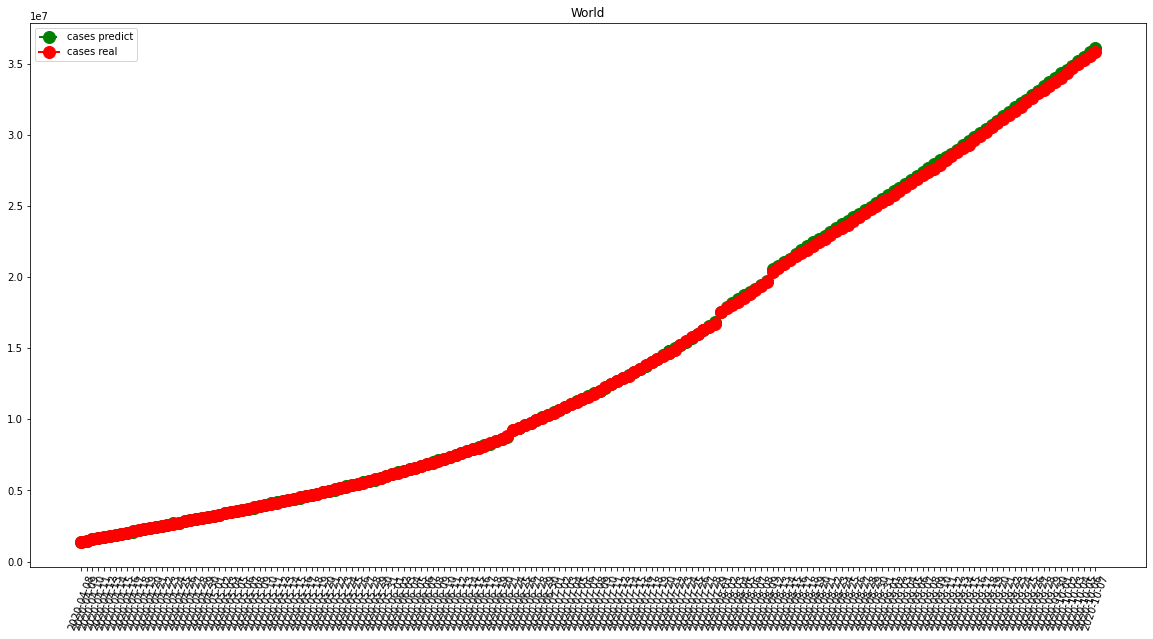

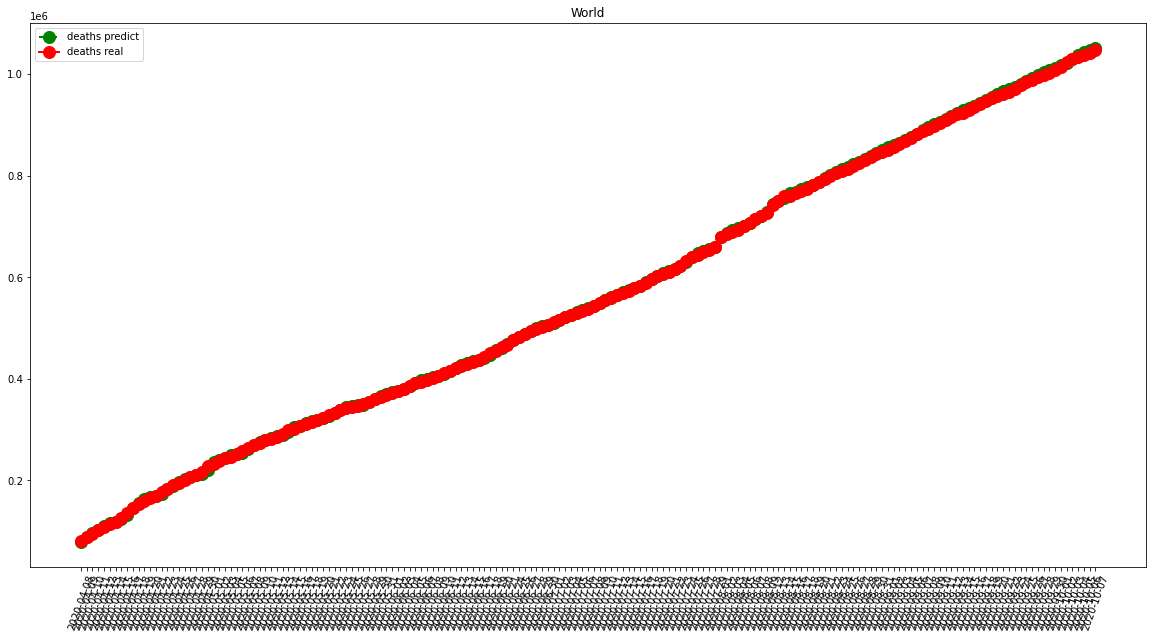

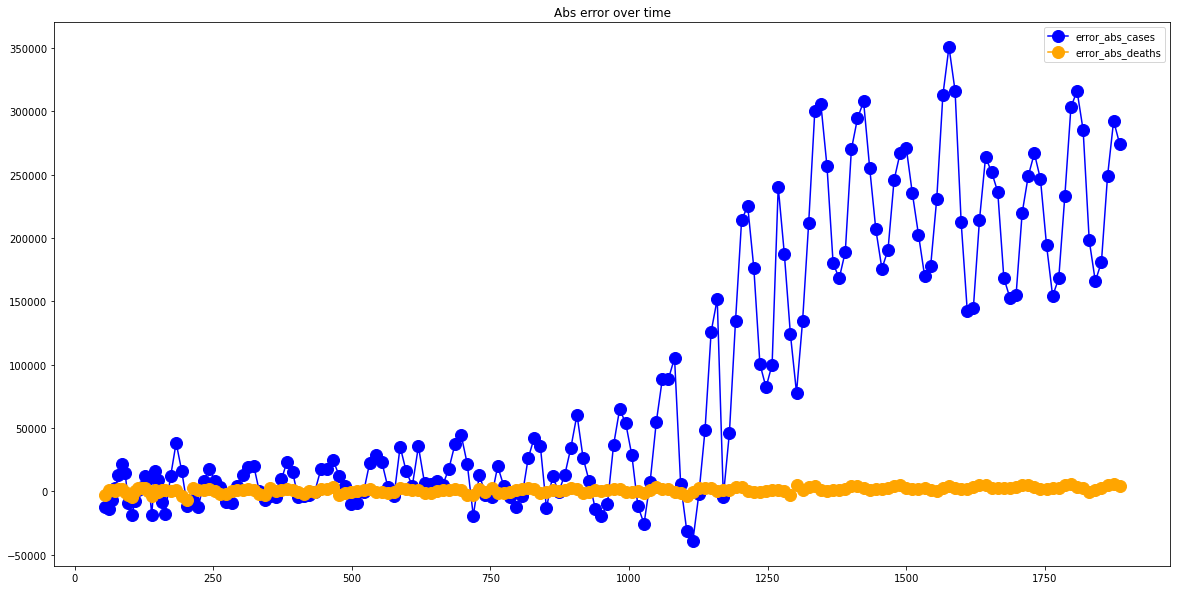

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1443.159574468085
RMSE =  2304.1628169975406
-- France performances for deaths --
MAE =  105.96808510638297
RMSE =  245.52616101890416


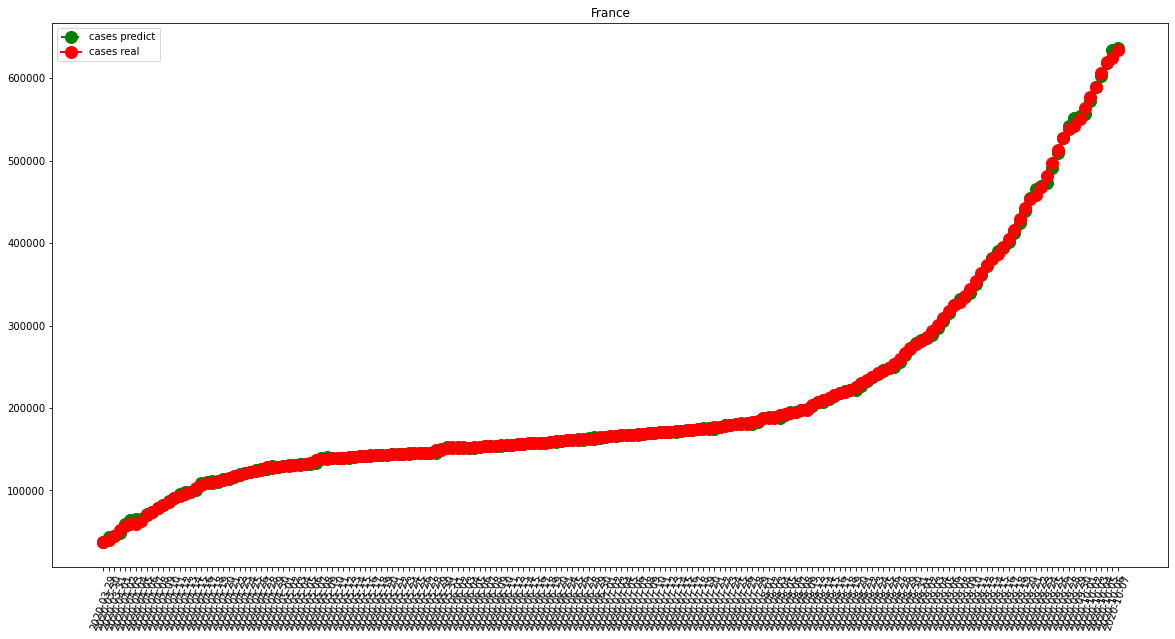

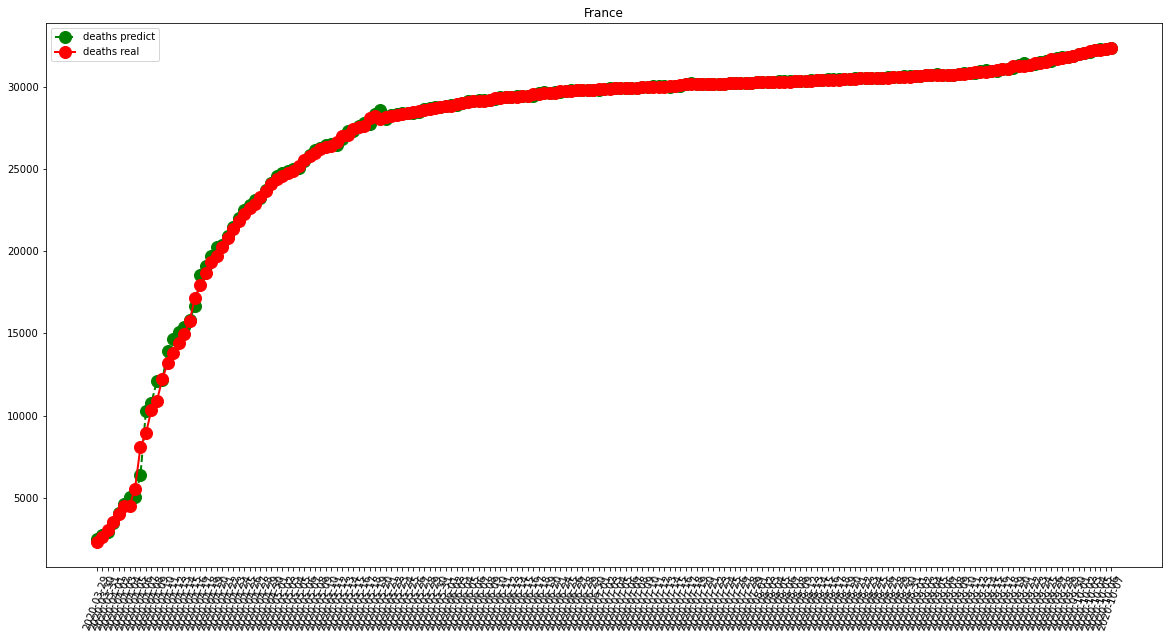

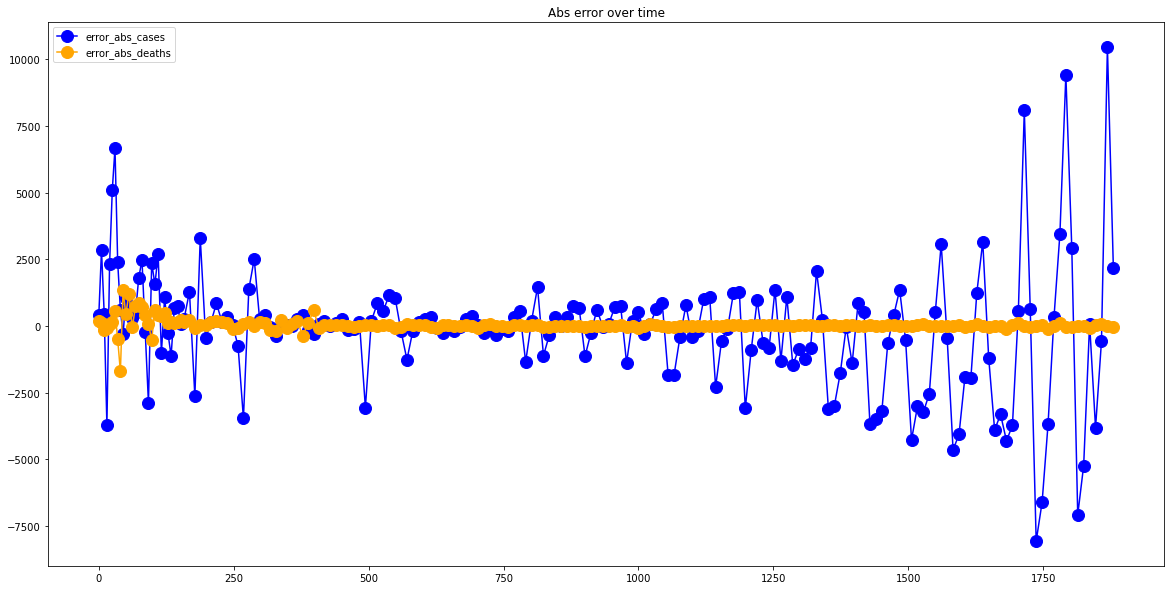

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  314.75531914893617
RMSE =  454.16988807498296
-- Italy performances for deaths --
MAE =  62.212765957446805
RMSE =  216.6158969432083


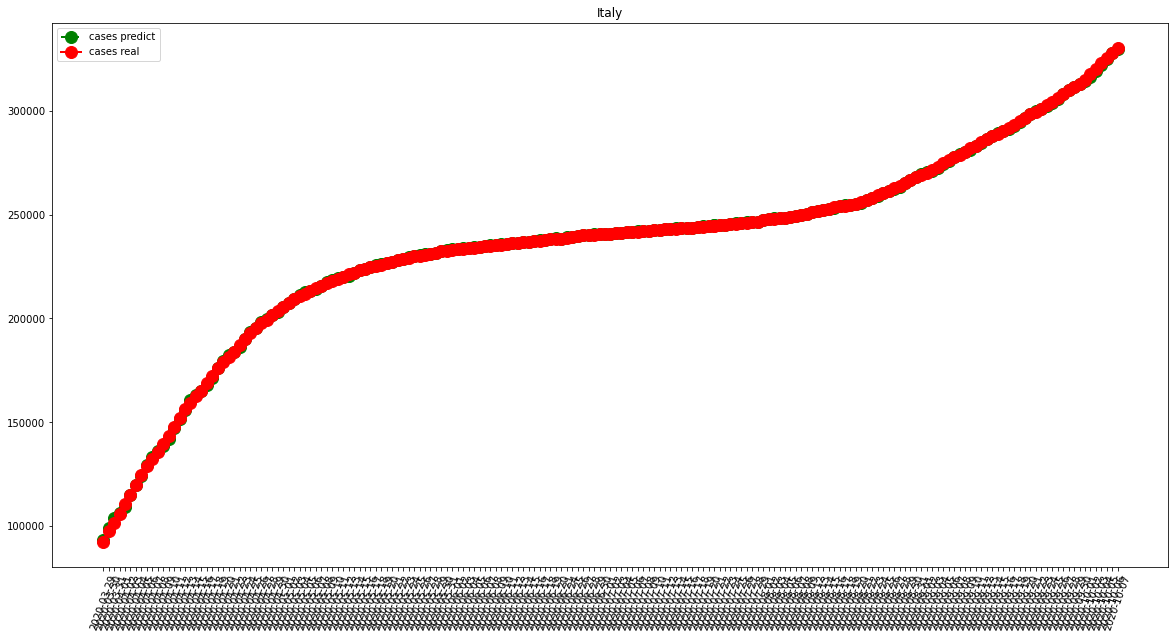

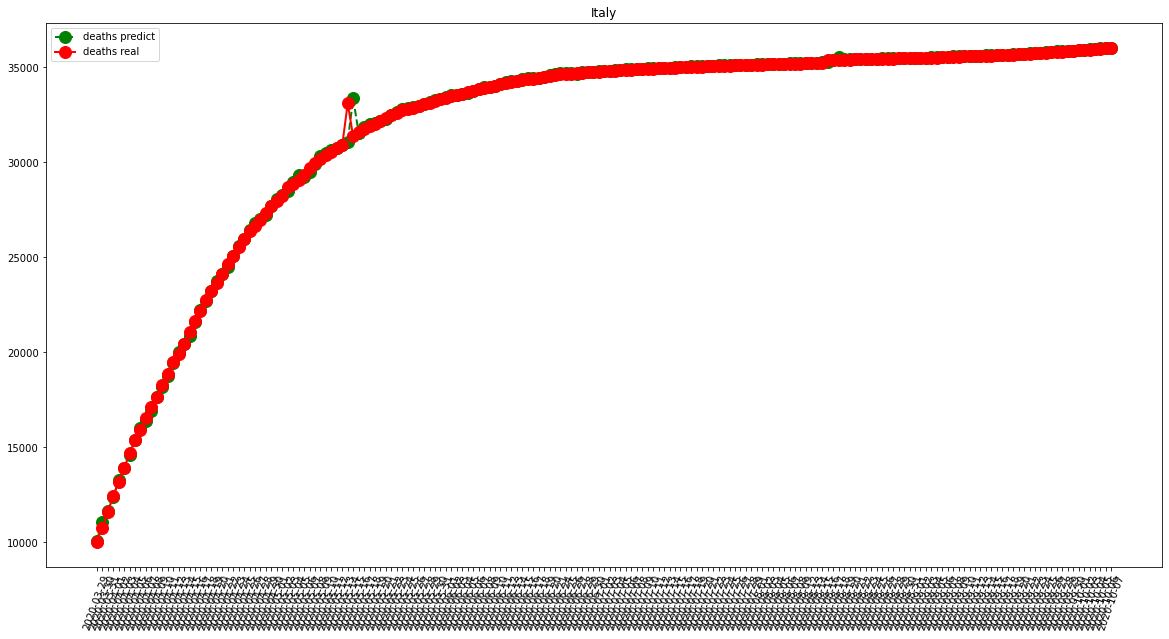

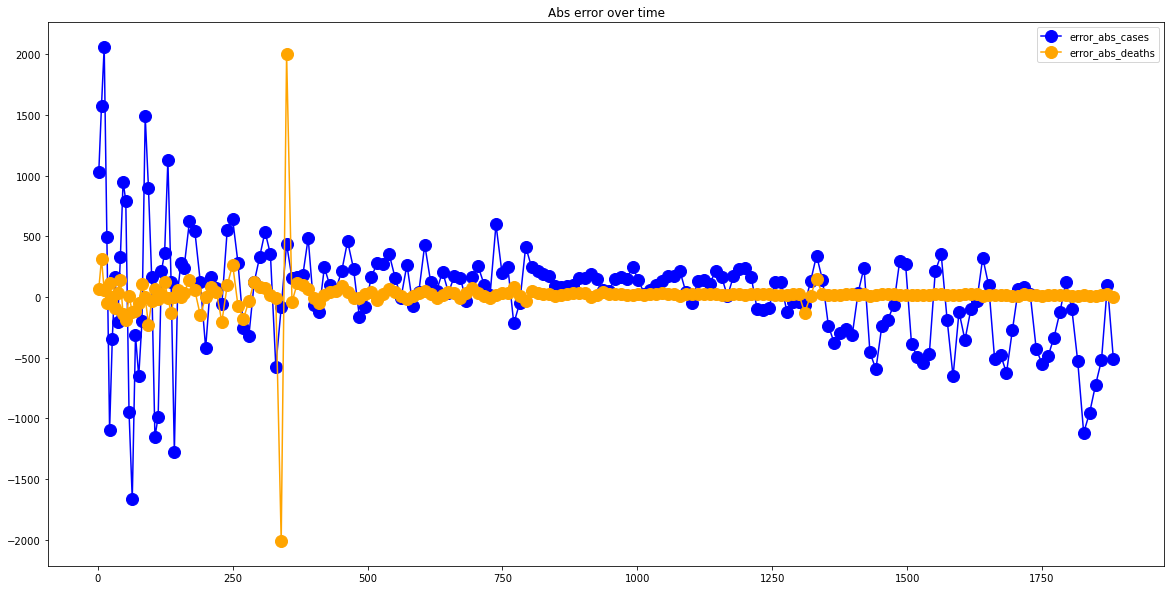

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  3021.4148936170213
RMSE =  5788.465348009469
-- Spain performances for deaths --
MAE =  119.09574468085107
RMSE =  300.1451421945368


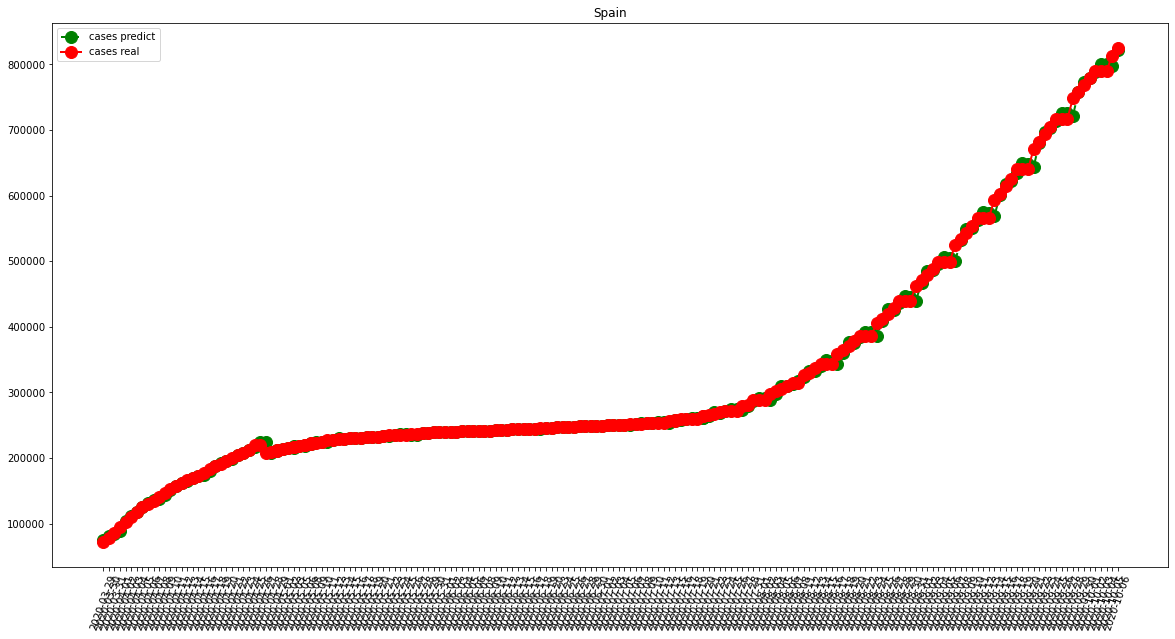

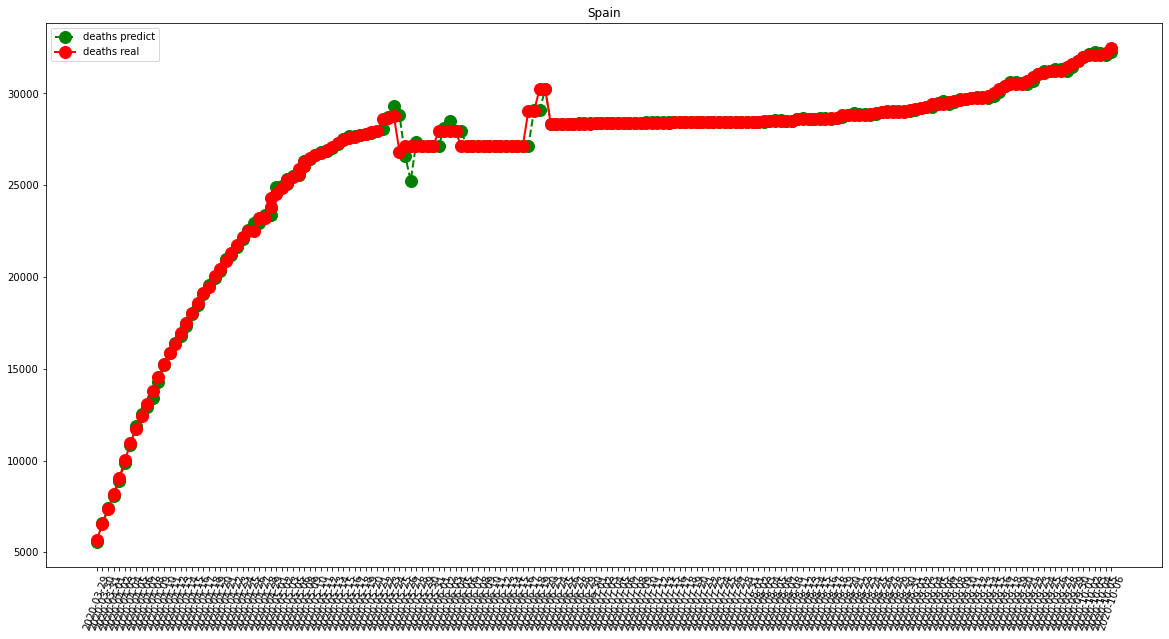

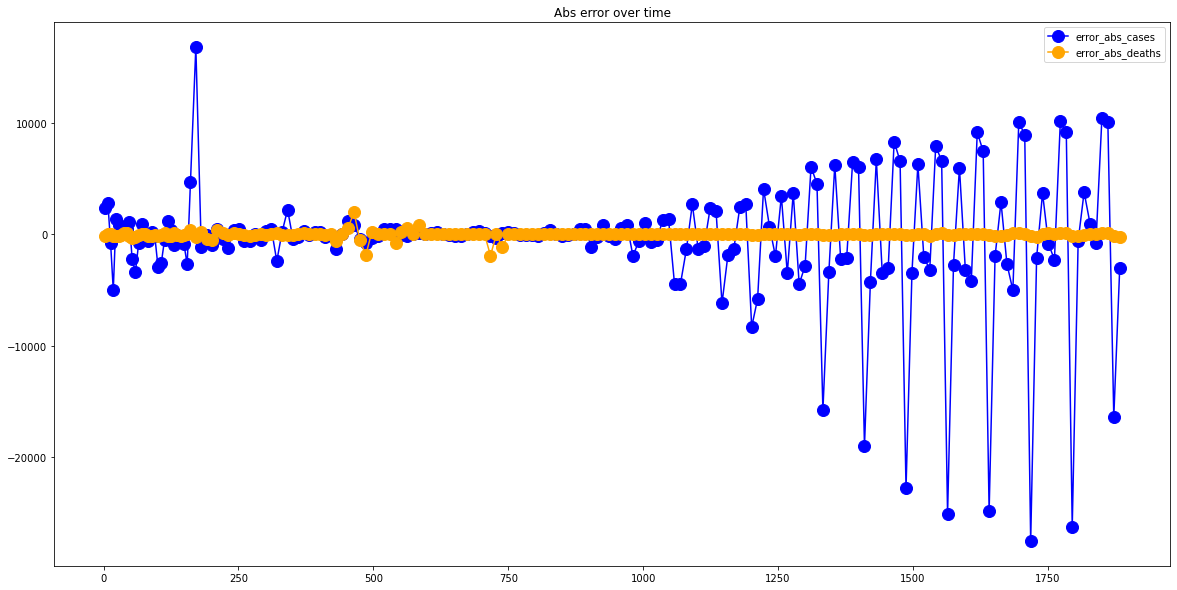

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  16884.66489361702
RMSE =  23999.822696707663
-- United States performances for deaths --
MAE =  477.47340425531917
RMSE =  662.898434985619


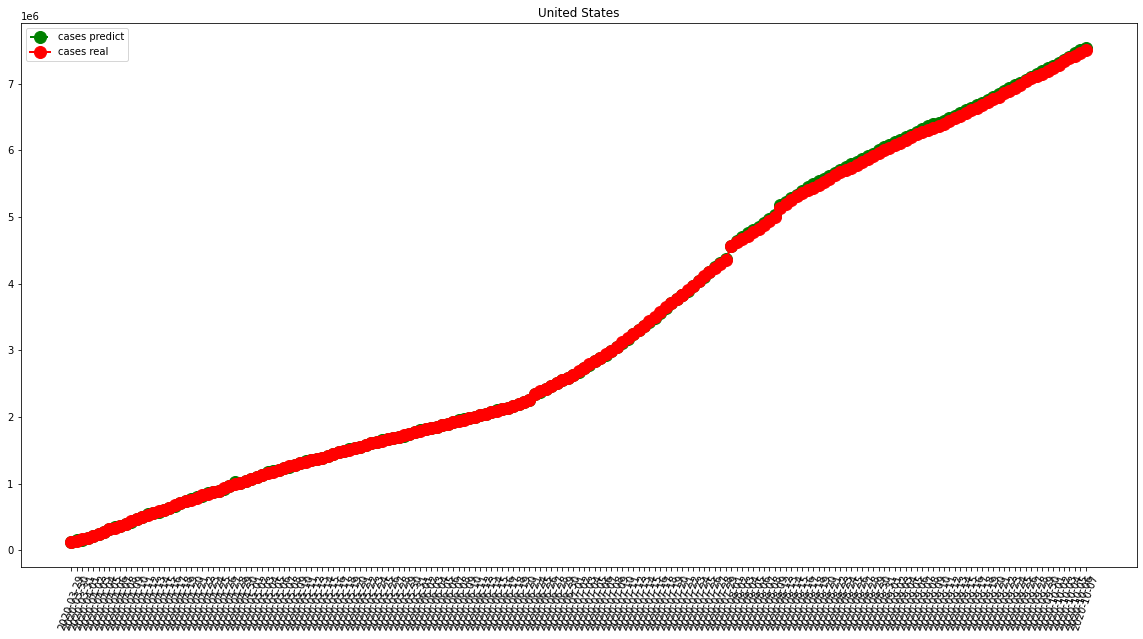

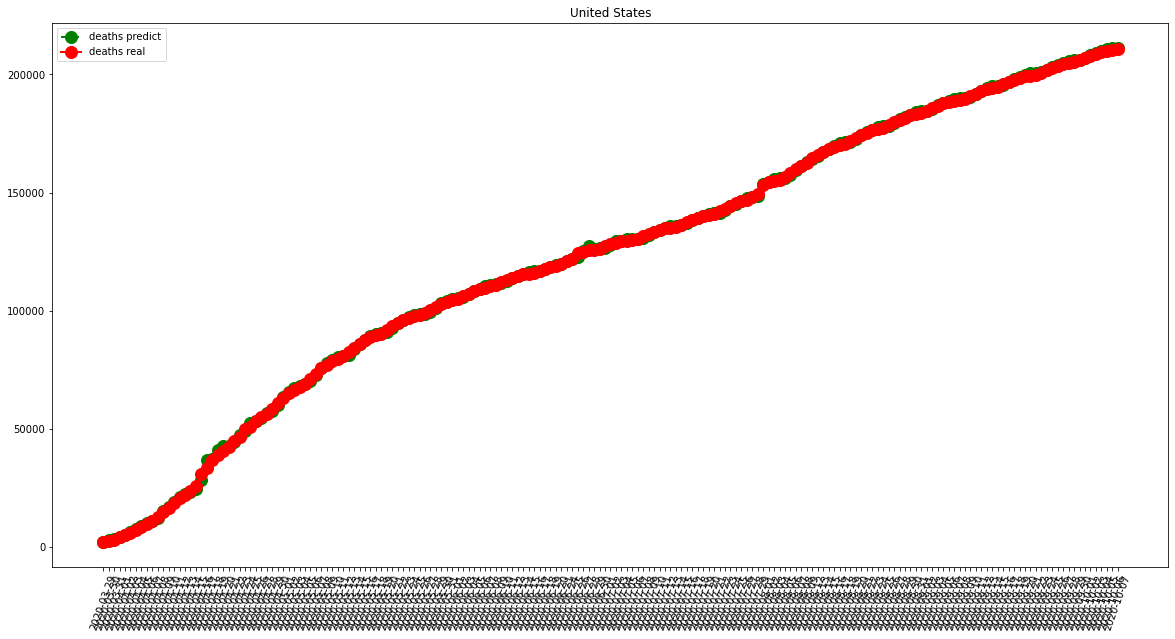

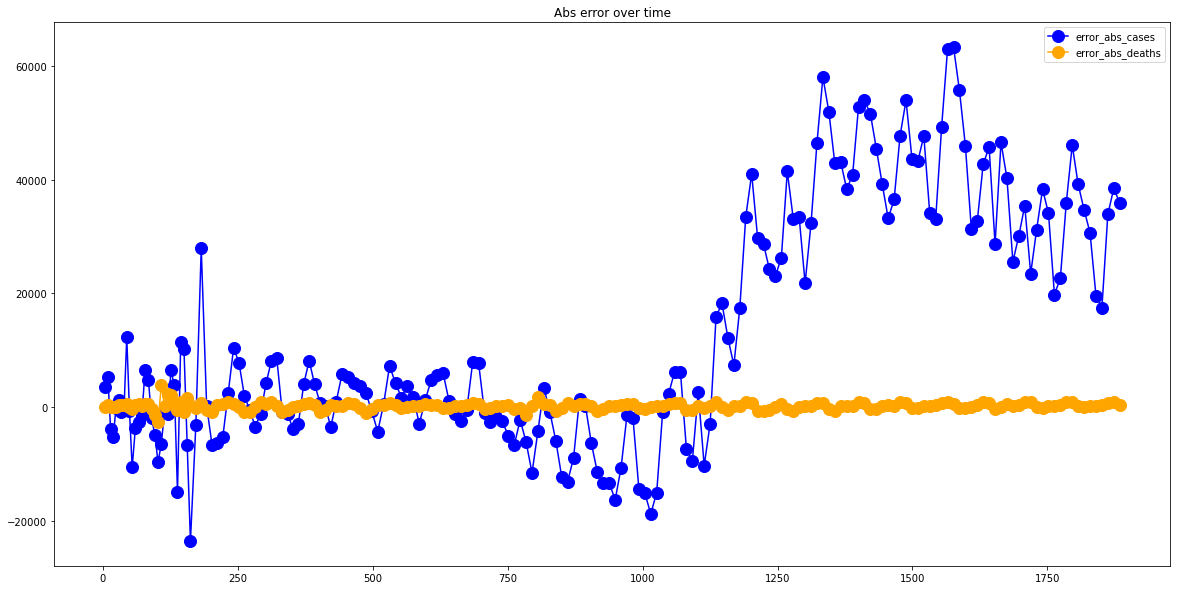

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  60.84574468085106
RMSE =  105.39215017803241
-- China performances for deaths --
MAE =  23.106382978723403
RMSE =  114.54187193132438


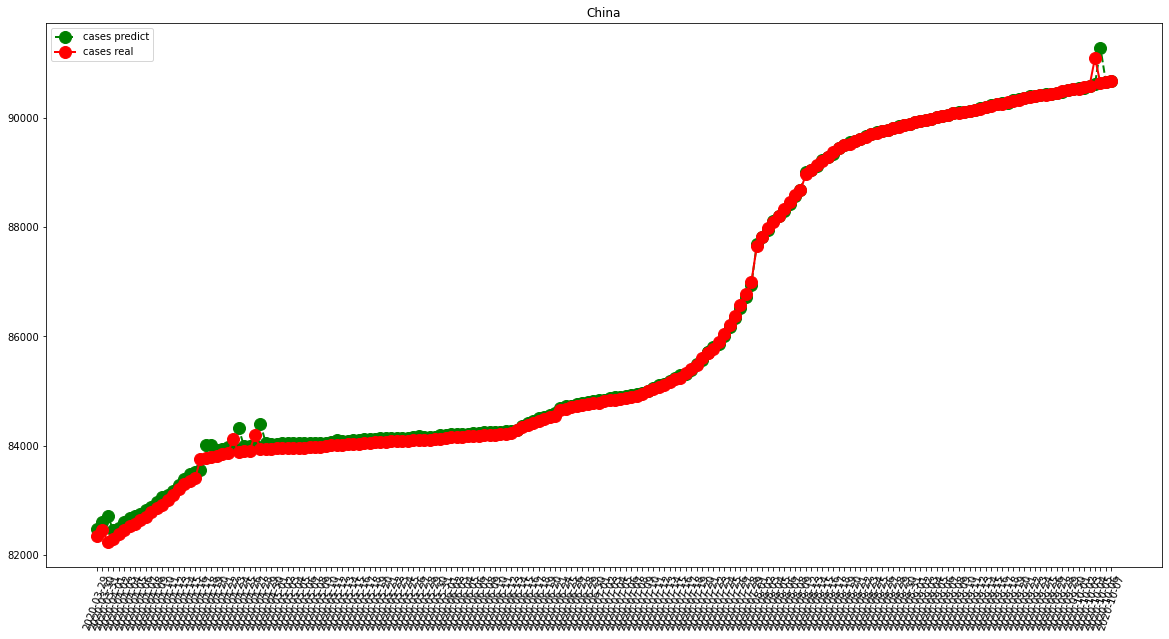

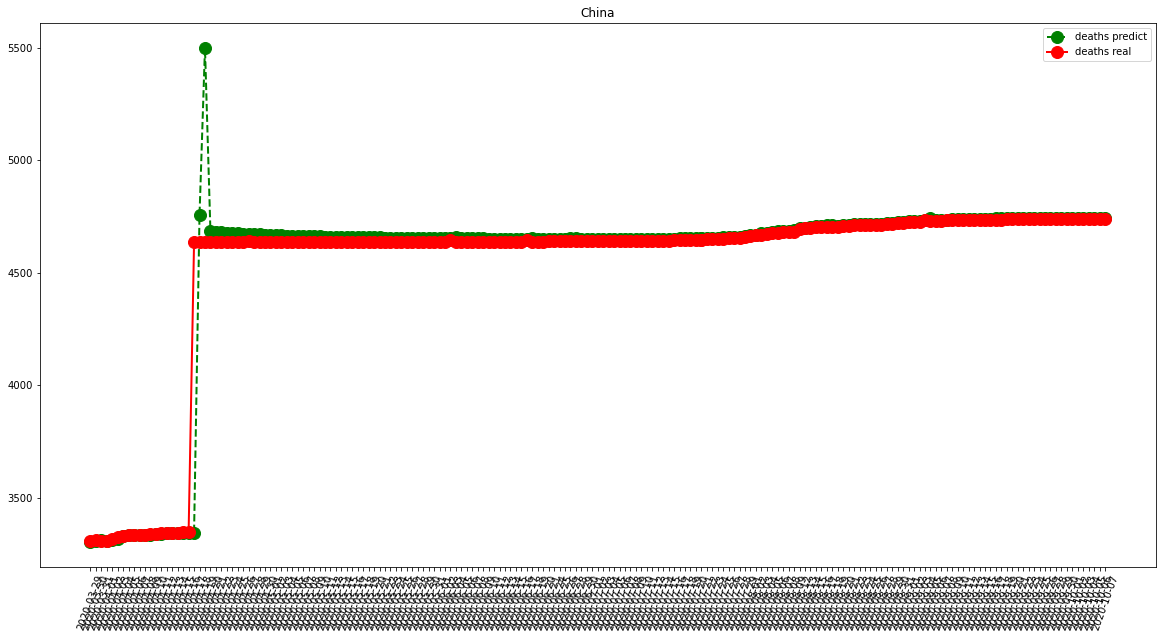

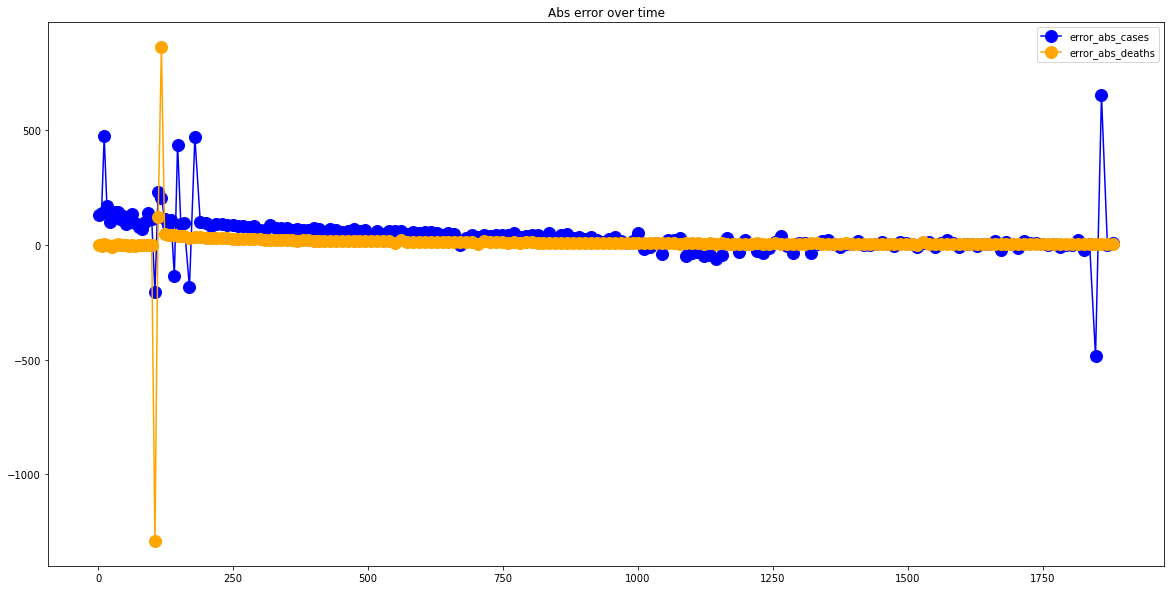

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1267.15
RMSE =  3735.726766641265
-- United Kingdom performances for deaths --
MAE =  195.4375
RMSE =  674.8396754044622


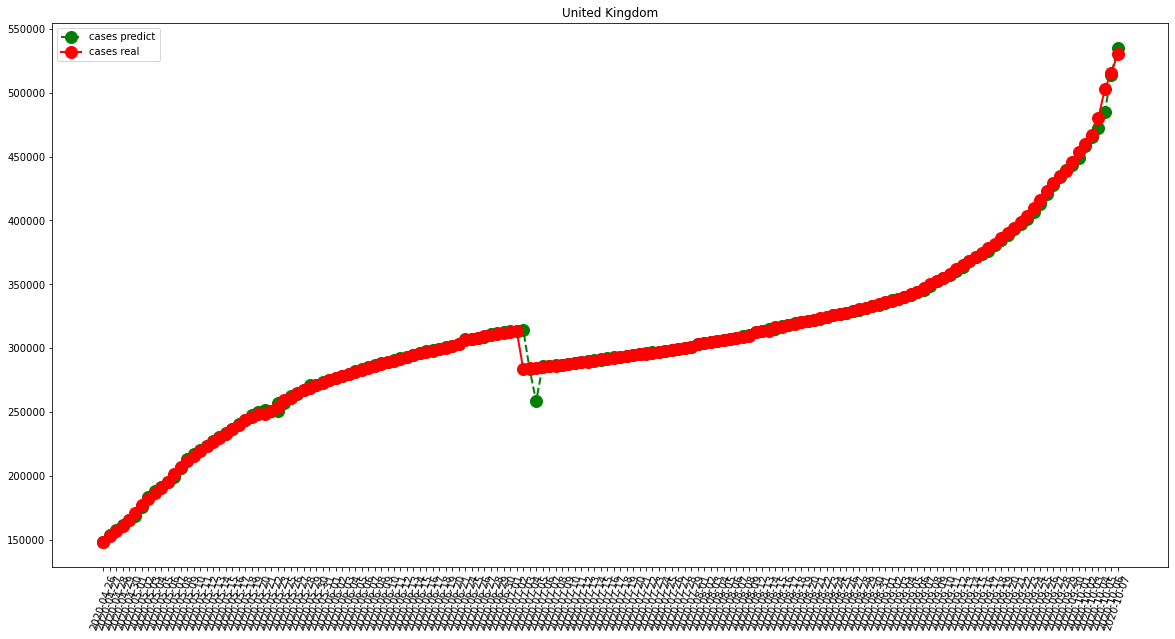

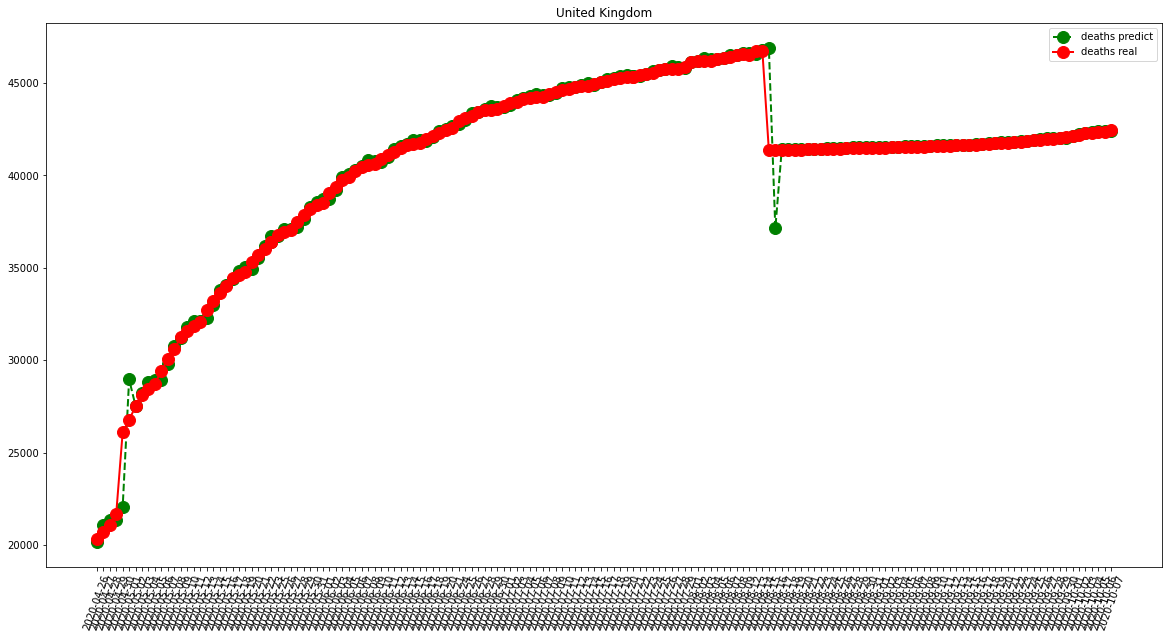

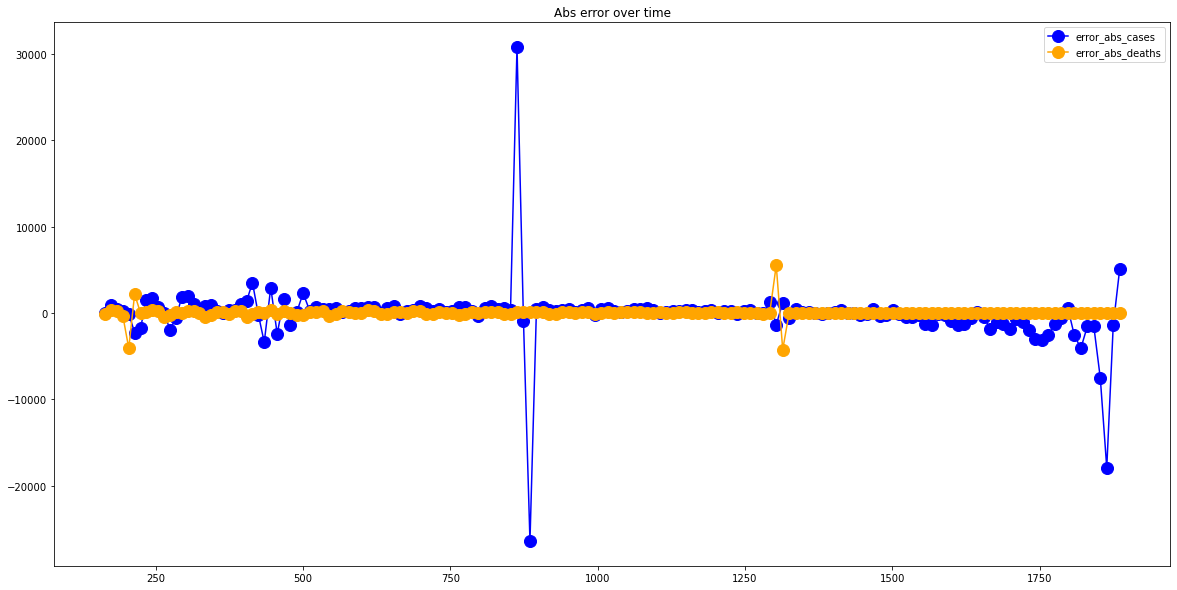

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  446.85
RMSE =  609.6741342717436
-- Germany performances for deaths --
MAE =  17.78125
RMSE =  34.94093230009755


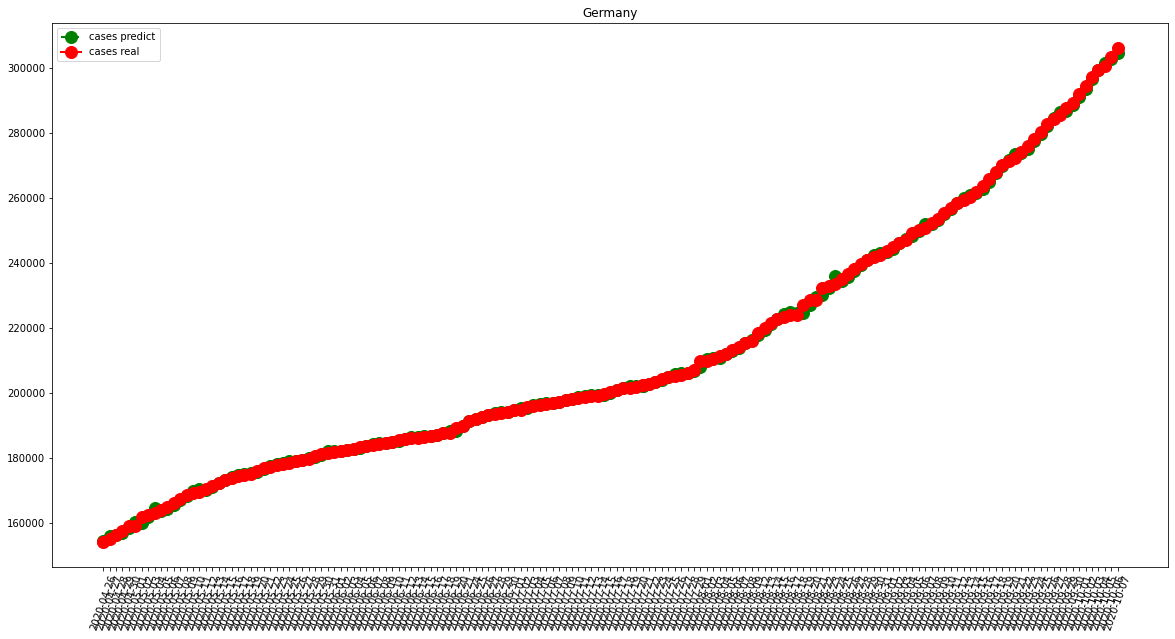

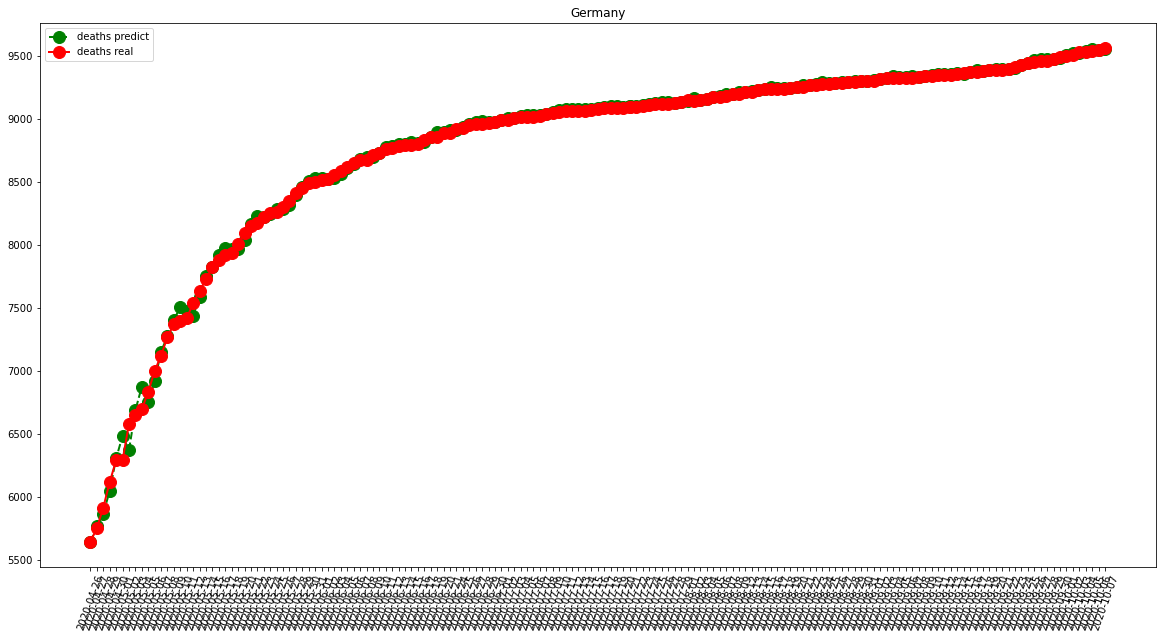

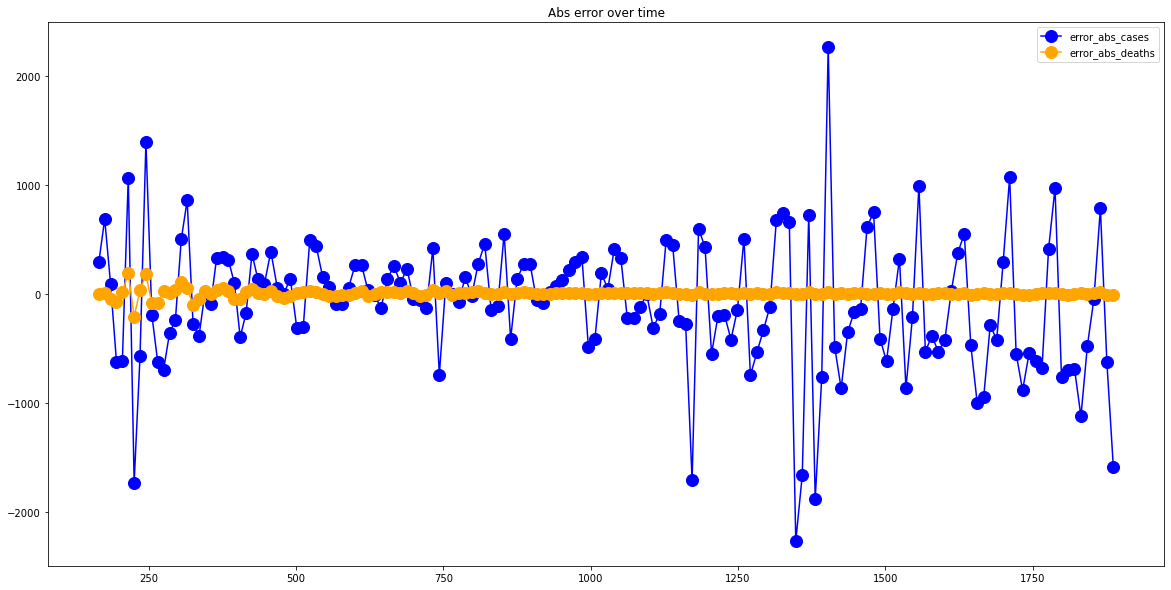

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  846.48125
RMSE =  1184.9909677925818
-- Iran performances for deaths --
MAE =  48.99375
RMSE =  81.38922686695089


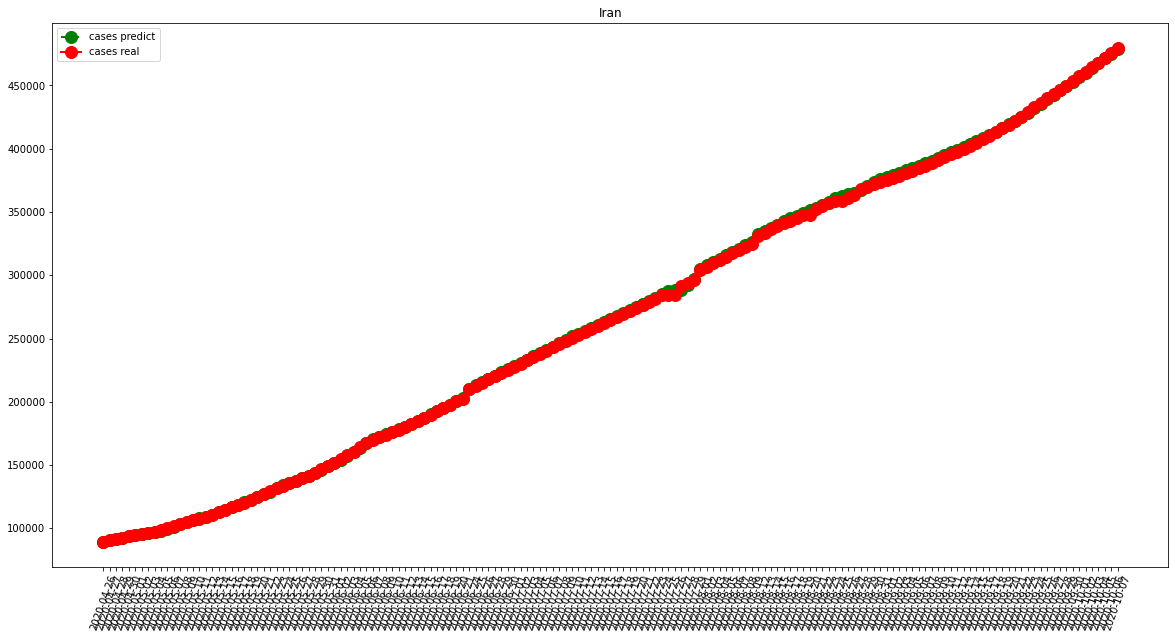

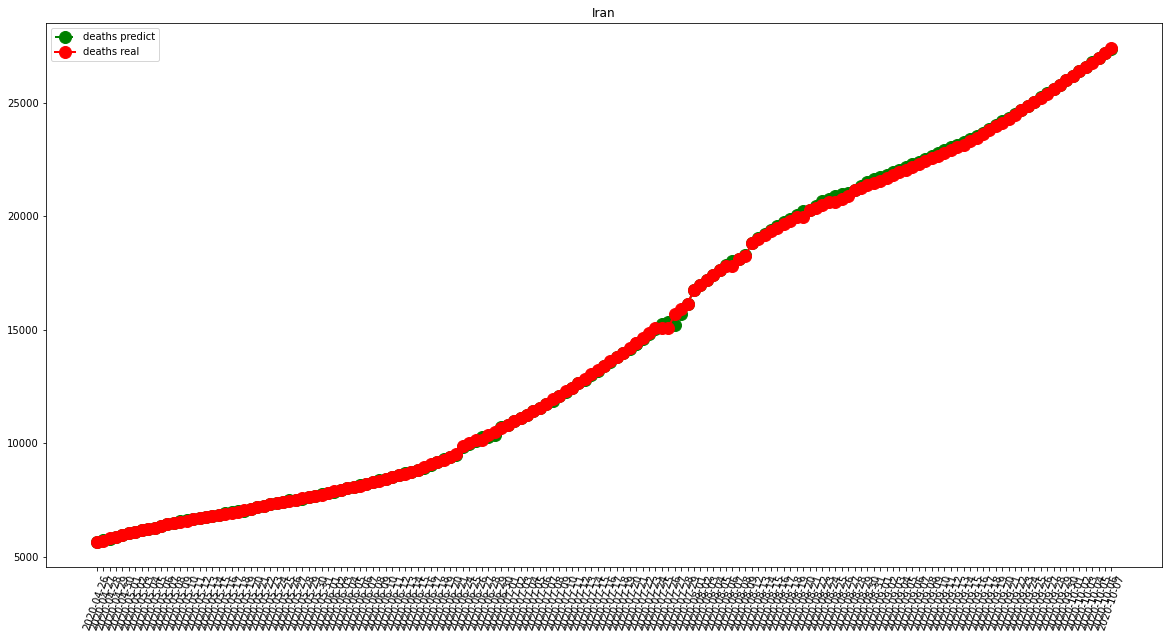

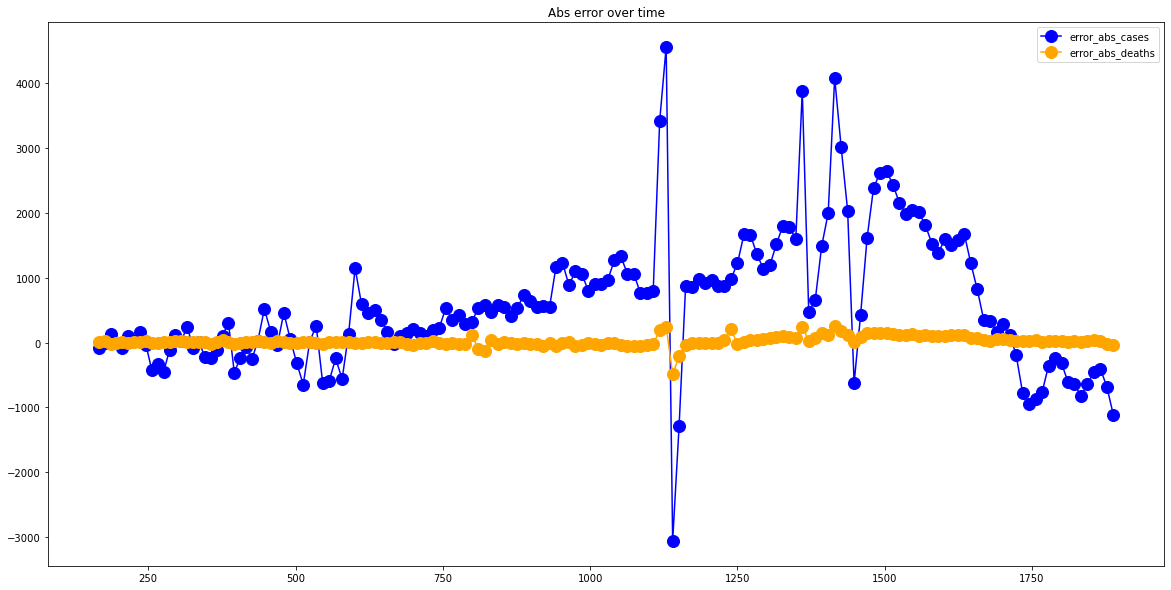

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  230.0375
RMSE =  330.16791182669465
-- Turkey performances for deaths --
MAE =  15.39375
RMSE =  80.54319493290541


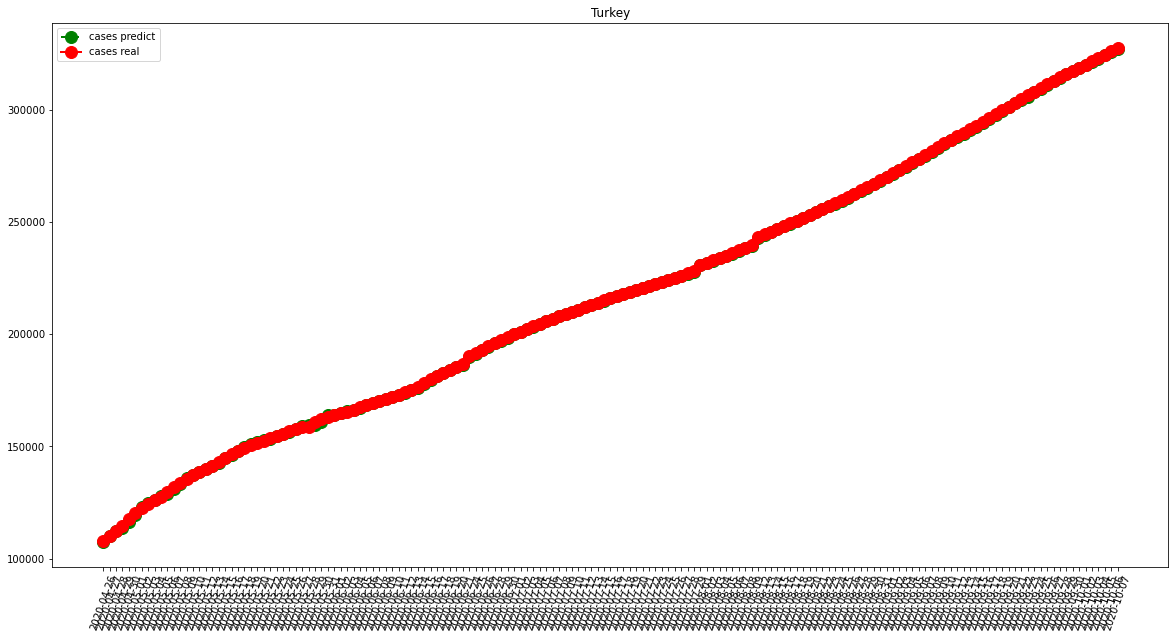

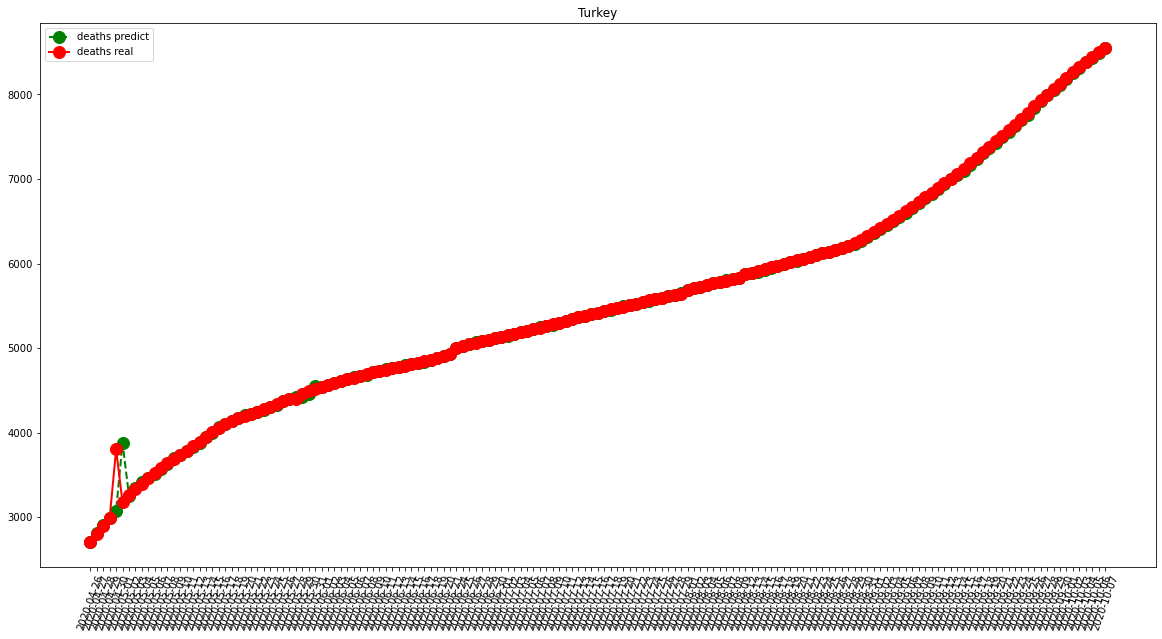

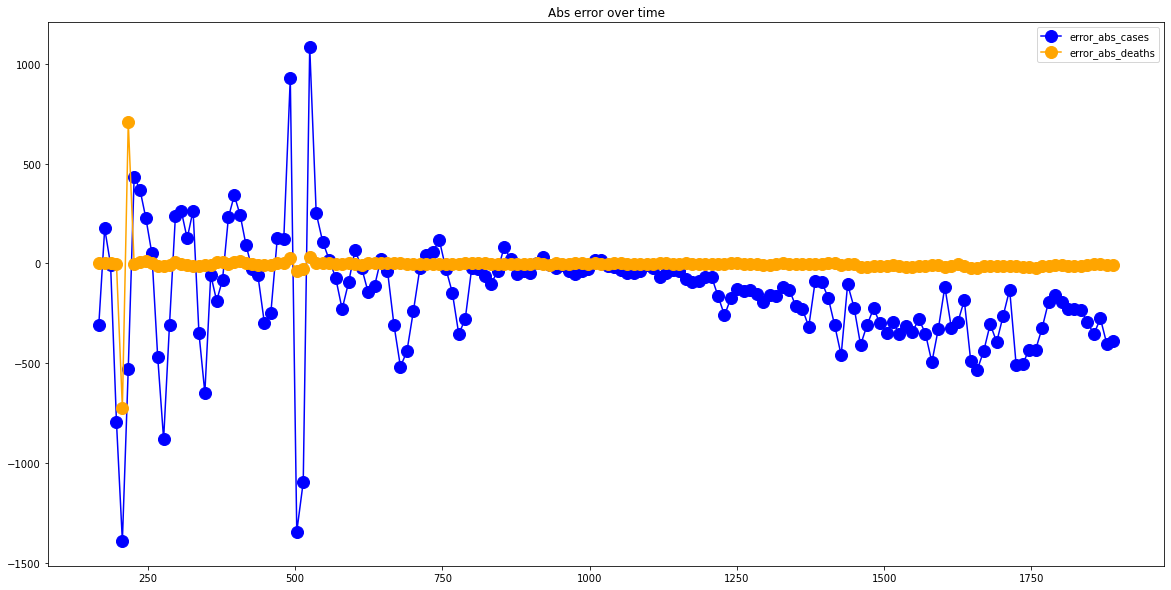

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  17917.984962406015
RMSE =  23021.986319064392
-- Brazil performances for deaths --
MAE =  524.1278195488721
RMSE =  628.0443509553425


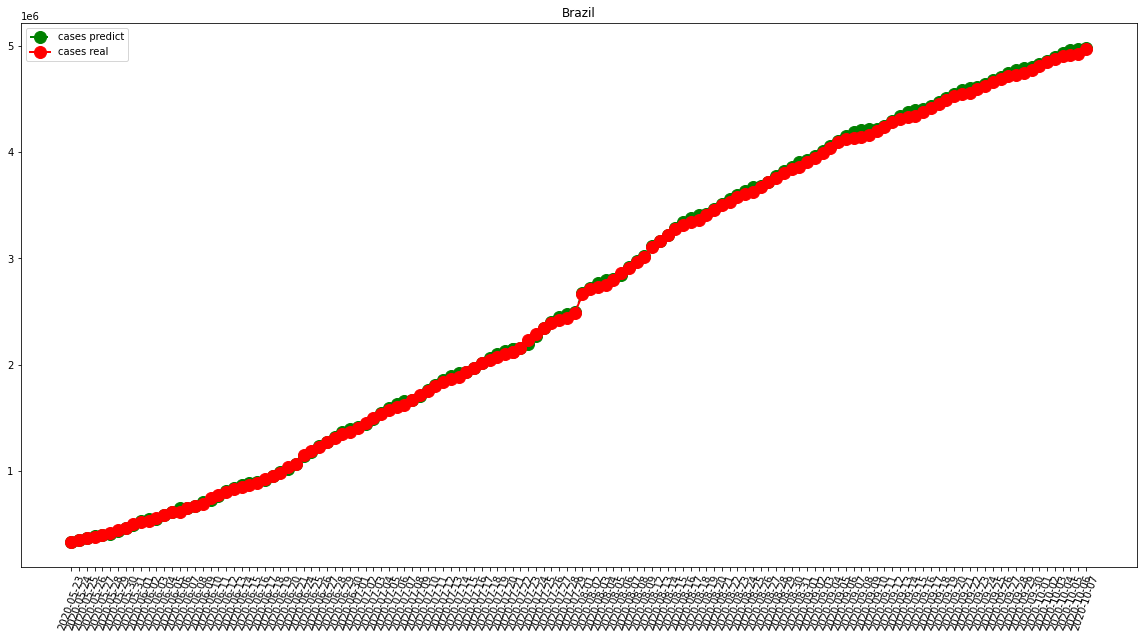

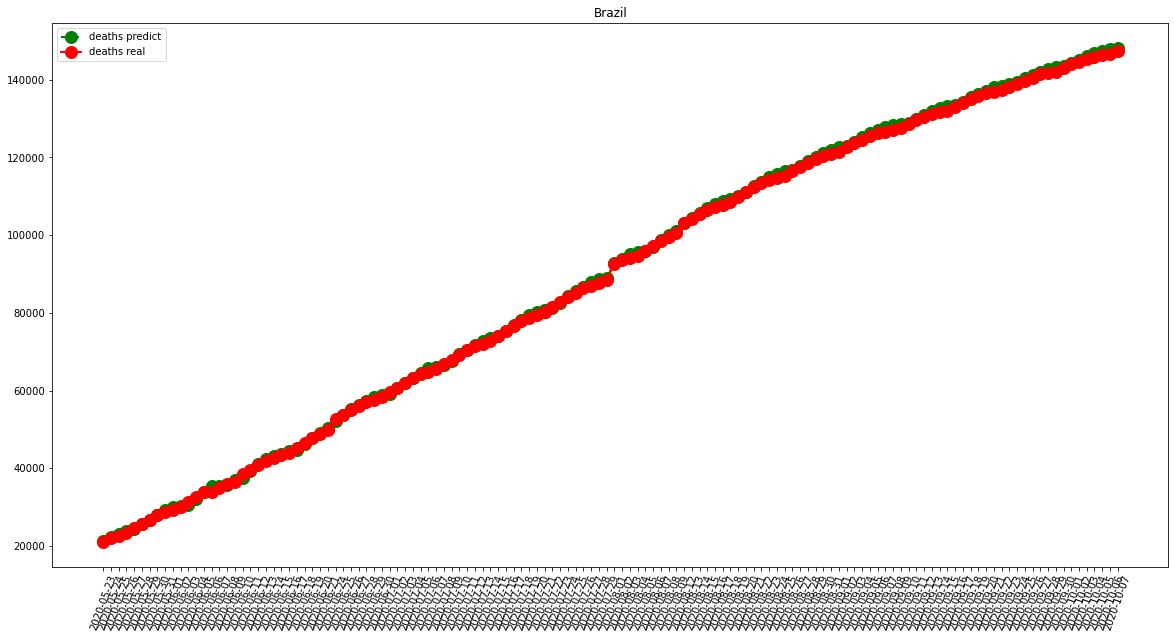

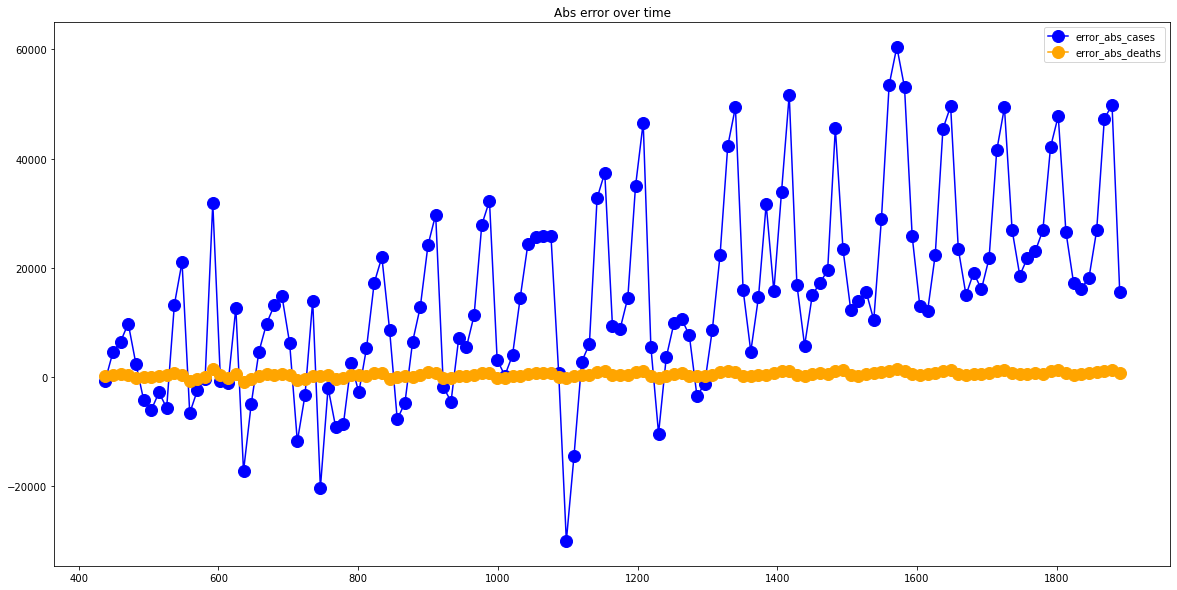

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"data\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)